In [2]:
%matplotlib inline
import numpy as np 
import cv2
from matplotlib import pyplot as plt 
from skimage.measure import compare_ssim
from skimage.measure import compare_psnr
import skimage.io as skio

from skimage import img_as_float, data
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, denoise_nl_means, estimate_sigma

ssim:  0.8765247762666432  psnr:  34.77775891100701


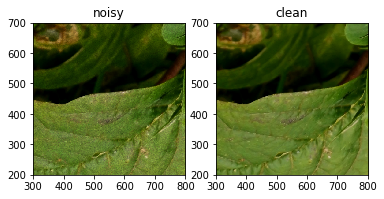

In [24]:
#show original noisy image and its corresponding clean image psnr and ssim
img_noisy_BGR = cv2.imread('test.png') #read in BGR
img_clean_BGR = cv2.imread('test_clean.png')
img_noisy_RGB = cv2.cvtColor(img_noisy_BGR, cv2.COLOR_BGR2RGB) #convert to RGB
img_clean_RGB = cv2.cvtColor(img_clean_BGR, cv2.COLOR_BGR2RGB) #convert to RGB

ssimval, ssimvis = compare_ssim(img_clean_RGB, img_noisy_RGB, full=True, multichannel=True)
psnrval = compare_psnr(img_clean_RGB, img_noisy_RGB)
print('ssim: ', ssimval, ' psnr: ', psnrval)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_noisy_RGB)
ax1.set_title('noisy')
ax1.set_xlim(300,800)
ax1.set_ylim(200,700)
ax2.imshow(img_clean_RGB)
ax2.set_title('clean')
ax2.set_xlim(300,800)
ax2.set_ylim(200,700)
plt.show()

ssim:  0.9668445036826429  psnr:  40.15583320949783


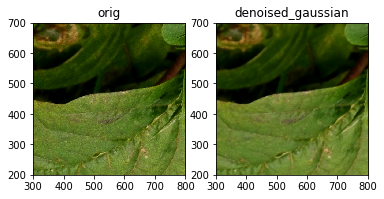

In [28]:
#Gaussian Blur (opencv implementation)

denoised_gaussian_BGR = cv2.GaussianBlur(img_noisy_BGR,(5,5),0) #kernel size 5
denoised_gaussian_RGB = cv2.cvtColor(denoised_gaussian_BGR, cv2.COLOR_BGR2RGB) #convert to RGB

ssimval, ssimvis = compare_ssim(denoised_gaussian_RGB, img_clean_RGB, full=True, multichannel=True)
psnrval = compare_psnr(denoised_gaussian_RGB, img_clean_RGB)
print('ssim: ', ssimval, ' psnr: ', psnrval)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_noisy_RGB)
ax1.set_title('orig')
ax1.set_xlim(300,800)
ax1.set_ylim(200,700)
ax2.imshow(denoised_gaussian_RGB)
ax2.set_title('denoised_gaussian')
ax2.set_xlim(300,800)
ax2.set_ylim(200,700)
plt.show()
#noisy spotsare removed, but edges are also now less clear

ssim:  0.966722230898181  psnr:  40.085531897532235


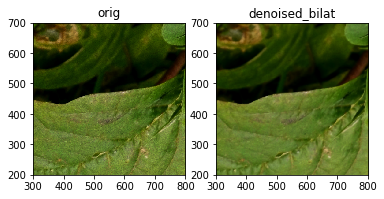

In [35]:
#bilateral filtering (opencv implementation)
denoised_bilat_RGB = cv2.bilateralFilter(img_noisy_RGB,5,150,150) #window size 5, color intensity sigma = 150, space sigma = 150

ssimval, ssimvis = compare_ssim(denoised_bilat_RGB, img_clean_RGB, full=True, multichannel=True)
psnrval = compare_psnr(denoised_bilat_RGB, img_clean_RGB)
print('ssim: ', ssimval, ' psnr: ', psnrval)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_noisy_RGB)
ax1.set_title('orig')
ax1.set_xlim(300,800)
ax1.set_ylim(200,700)
ax2.imshow(denoised_bilat_RGB)
ax2.set_title('denoised_bilat')
ax2.set_xlim(300,800)
ax2.set_ylim(200,700)
plt.show()

ssim:  0.9475236636476952  psnr:  36.728998605653075


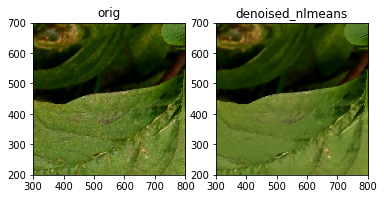

In [41]:
#nlmeans denoising (opencv implementation)
denoised_nlmeans_RGB = cv2.fastNlMeansDenoisingColored(img_noisy_RGB,None,5,5,5,50)
ssimval, ssimvis = compare_ssim(denoised_nlmeans_RGB, img_clean_RGB, full=True, multichannel=True)
psnrval = compare_psnr(denoised_nlmeans_RGB, img_clean_RGB)
print('ssim: ', ssimval, ' psnr: ', psnrval)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_noisy_RGB)
ax1.set_title('orig')
ax1.set_xlim(300,800)
ax1.set_ylim(200,700)
ax2.imshow(denoised_nlmeans_RGB)
ax2.set_title('denoised_nlmeans')
ax2.set_xlim(300,800)
ax2.set_ylim(200,700)
plt.show()